In [1]:
import pycbc.noise
from pycbc.noise import noise_from_psd
import pycbc.psd
import pylab as plt
import pycbc.filter as pfliter
from pycbc.waveform import get_td_waveform
import random
import numpy as np
import cProfile

/home/arush/anaconda3/envs/python39_1/lib/python3.9/site-packages/pycbc/types/array.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(True)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  import lal as _lal
PyCBC.libutils: pkg-config call failed, setting NO_PKGCONFIG=1


In [2]:
T = 4
flow = 30.0
delta_f = 1.0 / T
flen = int(2048 / delta_f) + 1
delta_t = 1.0 / 4096
tsamples = int(T / delta_t)

In [3]:
# PSD
psd = pycbc.psd.aLIGOZeroDetHighPower(flen, delta_f, flow)
noisesamples = int(4 / delta_t)
SNR_array_1 = []
random_scale = 1000

18 27
l =  0  SNR =  27.51461907693297  m1 =  18  m2 =  27
14 28
l =  0  SNR =  24.191909696825885  m1 =  14  m2 =  28
29 30
l =  0  SNR =  34.70300593734317  m1 =  29  m2 =  30
30 16
l =  0  SNR =  26.895441969557076  m1 =  30  m2 =  16
16 21
l =  0  SNR =  24.069687922349836  m1 =  16  m2 =  21
18 16
l =  0  SNR =  24.687520885235912  m1 =  18  m2 =  16
14 29
l =  0  SNR =  25.723648013025112  m1 =  14  m2 =  29
17 27
l =  0  SNR =  26.954888939301068  m1 =  17  m2 =  27
11 19
l =  0  SNR =  20.293856978454105  m1 =  11  m2 =  19
20 17
l =  0  SNR =  24.27714424544834  m1 =  20  m2 =  17
26 28
l =  0  SNR =  31.567466373924642  m1 =  26  m2 =  28
22 25
l =  0  SNR =  28.796778191923934  m1 =  22  m2 =  25
28 12
l =  0  SNR =  23.604411591639728  m1 =  28  m2 =  12
21 30
l =  0  SNR =  29.628512777154516  m1 =  21  m2 =  30
19 24
l =  0  SNR =  28.155471879859345  m1 =  19  m2 =  24
18 14
l =  0  SNR =  20.19062967311615  m1 =  18  m2 =  14
30 12
l =  0  SNR =  22.695451314976502  m1 

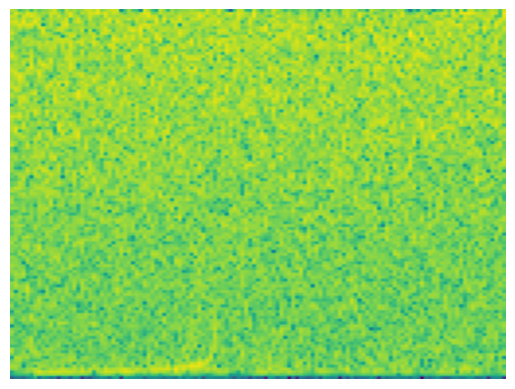

In [4]:
l = 0
while l < 100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    # rolling:

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 10
l =  100  SNR =  17.442631835471456  m1 =  12  m2 =  10
11 14
l =  101  SNR =  17.09042824074393  m1 =  11  m2 =  14
27 30
l =  102  SNR =  34.445541601894966  m1 =  27  m2 =  30
30 30
l =  102  SNR =  35.086750549951034  m1 =  30  m2 =  30
28 22
l =  102  SNR =  31.02810168255753  m1 =  28  m2 =  22
28 27
l =  102  SNR =  32.366099553392004  m1 =  28  m2 =  27
30 21
l =  102  SNR =  31.332545925729757  m1 =  30  m2 =  21
19 30
l =  102  SNR =  30.474578318146083  m1 =  19  m2 =  30
24 28
l =  102  SNR =  30.198076899944702  m1 =  24  m2 =  28
18 10
l =  102  SNR =  17.81503665521141  m1 =  18  m2 =  10
21 23
l =  103  SNR =  26.505007058506703  m1 =  21  m2 =  23
10 25
l =  103  SNR =  19.482272491429505  m1 =  10  m2 =  25
24 26
l =  104  SNR =  30.18282564920563  m1 =  24  m2 =  26
23 19
l =  104  SNR =  27.49618021987444  m1 =  23  m2 =  19
17 11
l =  104  SNR =  17.66211879650417  m1 =  17  m2 =  11
25 11
l =  105  SNR =  20.673504850855476  m1 =  25  m2 =  11
28 28
l =  105

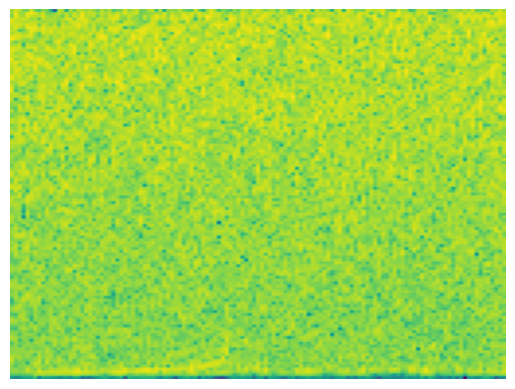

In [5]:
while l < 200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

26 15
l =  200  SNR =  25.19654531666544  m1 =  26  m2 =  15
19 24
l =  200  SNR =  27.19789546782425  m1 =  19  m2 =  24
11 19
l =  200  SNR =  18.90251067993679  m1 =  11  m2 =  19
25 29
l =  201  SNR =  34.95460499832345  m1 =  25  m2 =  29
25 26
l =  201  SNR =  30.646730457358082  m1 =  25  m2 =  26
24 27
l =  201  SNR =  30.324382175058577  m1 =  24  m2 =  27
27 13
l =  201  SNR =  23.493814450979794  m1 =  27  m2 =  13
25 17
l =  201  SNR =  25.418475491814913  m1 =  25  m2 =  17
25 26
l =  201  SNR =  31.49129501366031  m1 =  25  m2 =  26
14 10
l =  201  SNR =  18.208382397862632  m1 =  14  m2 =  10
11 10
l =  202  SNR =  17.707850812858975  m1 =  11  m2 =  10
15 19
l =  203  SNR =  22.377966729534055  m1 =  15  m2 =  19
28 14
l =  203  SNR =  25.836500467912185  m1 =  28  m2 =  14
12 20
l =  203  SNR =  22.31955818309084  m1 =  12  m2 =  20
12 29
l =  203  SNR =  21.737341860543825  m1 =  12  m2 =  29
28 16
l =  203  SNR =  25.648757313758743  m1 =  28  m2 =  16
13 10
l =  203

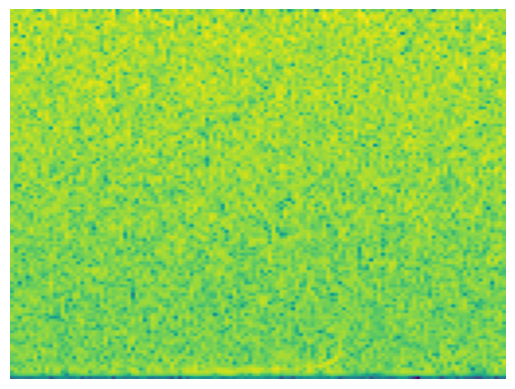

In [6]:
while l < 300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

12 22
l =  300  SNR =  21.20983125758018  m1 =  12  m2 =  22
21 10
l =  300  SNR =  19.44687808497174  m1 =  21  m2 =  10
18 20
l =  301  SNR =  25.934068243184313  m1 =  18  m2 =  20
13 30
l =  301  SNR =  23.762616798075076  m1 =  13  m2 =  30
18 11
l =  301  SNR =  20.134899588223835  m1 =  18  m2 =  11
28 22
l =  301  SNR =  30.161864792060495  m1 =  28  m2 =  22
20 14
l =  301  SNR =  23.677570485877975  m1 =  20  m2 =  14
16 30
l =  301  SNR =  24.253117336154073  m1 =  16  m2 =  30
30 15
l =  301  SNR =  26.075530784724563  m1 =  30  m2 =  15
16 19
l =  301  SNR =  23.48108639618333  m1 =  16  m2 =  19
11 27
l =  301  SNR =  21.300703463867414  m1 =  11  m2 =  27
11 28
l =  301  SNR =  22.129462396794583  m1 =  11  m2 =  28
13 19
l =  301  SNR =  21.813140621356087  m1 =  13  m2 =  19
13 20
l =  301  SNR =  22.744282723754797  m1 =  13  m2 =  20
18 10
l =  301  SNR =  18.651629806636375  m1 =  18  m2 =  10
21 17
l =  302  SNR =  24.52275109708326  m1 =  21  m2 =  17
29 19
l =  3

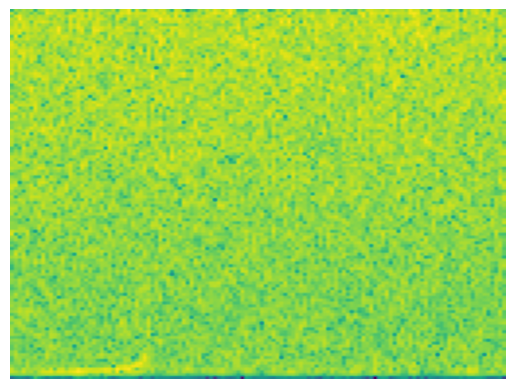

In [7]:
while l < 400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 28


l =  400  SNR =  24.14866393640355  m1 =  15  m2 =  28
21 12
l =  400  SNR =  22.080529775048102  m1 =  21  m2 =  12
25 23
l =  400  SNR =  30.088339278547508  m1 =  25  m2 =  23
16 22
l =  400  SNR =  22.659442044204795  m1 =  16  m2 =  22
21 24
l =  400  SNR =  27.89791463725637  m1 =  21  m2 =  24
26 24
l =  400  SNR =  30.659348451276678  m1 =  26  m2 =  24
30 30
l =  400  SNR =  36.47680835275372  m1 =  30  m2 =  30
10 13
l =  400  SNR =  18.39971463737828  m1 =  10  m2 =  13
13 20
l =  401  SNR =  21.25262947303896  m1 =  13  m2 =  20
19 26
l =  401  SNR =  28.627518869406064  m1 =  19  m2 =  26
16 10
l =  401  SNR =  20.529404854235445  m1 =  16  m2 =  10
19 22
l =  401  SNR =  26.114606548100454  m1 =  19  m2 =  22
26 29
l =  401  SNR =  32.95909134987847  m1 =  26  m2 =  29
29 20
l =  401  SNR =  30.28253128050583  m1 =  29  m2 =  20
12 30
l =  401  SNR =  22.652114884163755  m1 =  12  m2 =  30
11 24
l =  401  SNR =  20.214891643522137  m1 =  11  m2 =  24
23 18
l =  401  SNR =

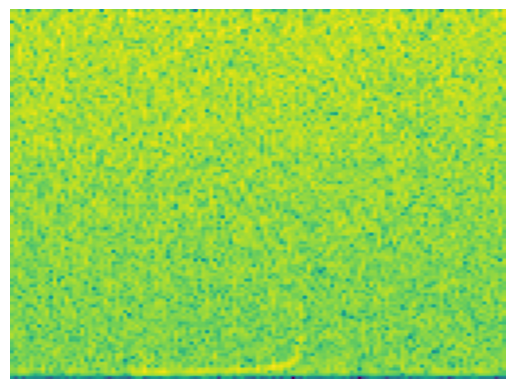

In [8]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    # saving the data by SNR
    if snr_peak > 5 and snr_peak < 8:
        file_loc = "5_to_8"
    elif snr_peak > 8 and snr_peak < 11:
        file_loc = "8_to_11"
    elif snr_peak > 11 and snr_peak < 14:
        file_loc = "11_to_14"
    elif snr_peak > 14 and snr_peak < 17:
        file_loc = "14_to_17"
    elif snr_peak > 17 and snr_peak < 20:
        file_loc = "17_to_20"
    else:
        file_loc = 0

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

In [9]:
while l < 500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 14
l =  500  SNR =  23.964493618429447  m1 =  24  m2 =  14
29 20
l =  500  SNR =  30.468667901072447  m1 =  29  m2 =  20
27 15
l =  500  SNR =  26.420373370110777  m1 =  27  m2 =  15
16 13
l =  500  SNR =  20.22229641513377  m1 =  16  m2 =  13
29 30
l =  500  SNR =  35.22743394138285  m1 =  29  m2 =  30
12 11
l =  500  SNR =  16.72810437607299  m1 =  12  m2 =  11
18 15
l =  501  SNR =  21.12758285239061  m1 =  18  m2 =  15
20 15
l =  501  SNR =  22.14817805752705  m1 =  20  m2 =  15
28 12
l =  501  SNR =  23.073751463924843  m1 =  28  m2 =  12
26 10
l =  501  SNR =  21.197794574974743  m1 =  26  m2 =  10
15 10
l =  501  SNR =  19.435596055517408  m1 =  15  m2 =  10
20 17
l =  502  SNR =  24.27468301828922  m1 =  20  m2 =  17
17 27
l =  502  SNR =  26.08958238564798  m1 =  17  m2 =  27
15 26
l =  502  SNR =  23.59454823320303  m1 =  15  m2 =  26
13 16
l =  502  SNR =  19.304849386574464  m1 =  13  m2 =  16
22 23
l =  503  SNR =  27.476267373494156  m1 =  22  m2 =  23
14 22
l =  503  

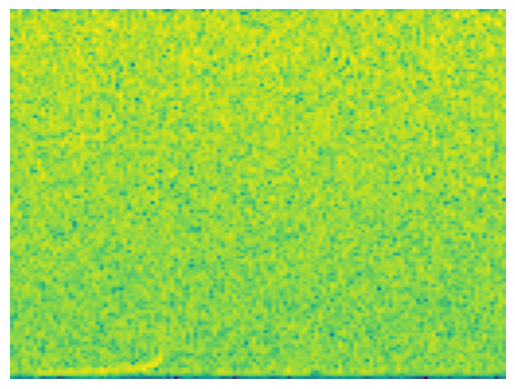

In [10]:
while l < 600:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

11 10
l =  600  SNR =  16.703619692524807  m1 =  11  m2 =  10
24 28
l =  601  SNR =  32.34904299473819  m1 =  24  m2 =  28
29 22
l =  601  SNR =  31.63156951218034  m1 =  29  m2 =  22
23 19
l =  601  SNR =  26.053672679121032  m1 =  23  m2 =  19
26 30
l =  601  SNR =  32.287162407806285  m1 =  26  m2 =  30
29 23
l =  601  SNR =  30.533999080413523  m1 =  29  m2 =  23
12 12
l =  601  SNR =  17.782061729137105  m1 =  12  m2 =  12
11 18
l =  602  SNR =  18.06804646391441  m1 =  11  m2 =  18
19 10
l =  603  SNR =  18.97640574022858  m1 =  19  m2 =  10
11 29
l =  604  SNR =  21.50386767799905  m1 =  11  m2 =  29
11 30
l =  604  SNR =  20.145001041481194  m1 =  11  m2 =  30
18 26
l =  604  SNR =  29.549811032223655  m1 =  18  m2 =  26
13 14
l =  604  SNR =  19.648647166596188  m1 =  13  m2 =  14
20 17
l =  605  SNR =  24.504475278926396  m1 =  20  m2 =  17
20 23
l =  605  SNR =  27.3371646748485  m1 =  20  m2 =  23
11 23
l =  605  SNR =  20.358677664848003  m1 =  11  m2 =  23
15 30
l =  605 

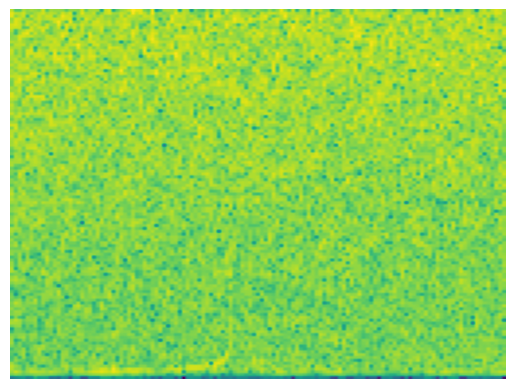

In [11]:
while l < 700:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

30 30
l =  700  SNR =  34.96781761901626  m1 =  30  m2 =  30
19 22
l =  700  SNR =  25.98363920152711  m1 =  19  m2 =  22
30 23
l =  700  SNR =  30.420949160775432  m1 =  30  m2 =  23
29 24
l =  700  SNR =  31.53245457130975  m1 =  29  m2 =  24
10 12
l =  700  SNR =  18.059878894269268  m1 =  10  m2 =  12
30 12
l =  701  SNR =  23.788667170553293  m1 =  30  m2 =  12
23 17
l =  701  SNR =  24.870773842083654  m1 =  23  m2 =  17
25 11
l =  701  SNR =  20.844251543733925  m1 =  25  m2 =  11
20 24
l =  701  SNR =  27.591206749464117  m1 =  20  m2 =  24
12 15
l =  701  SNR =  17.833420819608477  m1 =  12  m2 =  15
11 25
l =  702  SNR =  21.166429965858086  m1 =  11  m2 =  25
18 24
l =  702  SNR =  26.810807202549896  m1 =  18  m2 =  24
15 20
l =  702  SNR =  24.513834382213346  m1 =  15  m2 =  20
22 30
l =  702  SNR =  30.725965236050282  m1 =  22  m2 =  30
15 16
l =  702  SNR =  21.53555640528932  m1 =  15  m2 =  16
29 23
l =  702  SNR =  30.716963759540214  m1 =  29  m2 =  23
29 26
l =  7

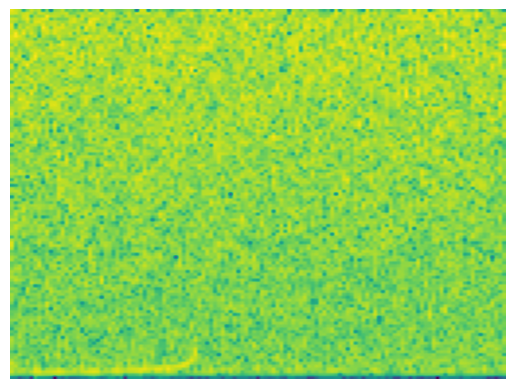

In [12]:
while l < 800:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

10 10
l =  800  SNR =  13.72791917552022  m1 =  10  m2 =  10
13 26
l =  801  SNR =  23.861256448673227  m1 =  13  m2 =  26
21 27
l =  801  SNR =  31.094257228410026  m1 =  21  m2 =  27
14 18
l =  801  SNR =  20.405460203331035  m1 =  14  m2 =  18
21 26
l =  801  SNR =  29.599884507935833  m1 =  21  m2 =  26
28 26
l =  801  SNR =  31.720107533600522  m1 =  28  m2 =  26
22 20
l =  801  SNR =  26.916994035566372  m1 =  22  m2 =  20
19 23
l =  801  SNR =  26.16655854030181  m1 =  19  m2 =  23
26 28
l =  801  SNR =  33.34820634405382  m1 =  26  m2 =  28
18 17
l =  801  SNR =  22.29628085971603  m1 =  18  m2 =  17
24 14
l =  801  SNR =  22.1251082678101  m1 =  24  m2 =  14
29 15
l =  801  SNR =  24.25233760492686  m1 =  29  m2 =  15
18 21
l =  801  SNR =  25.584028661331313  m1 =  18  m2 =  21
22 10
l =  801  SNR =  20.841004285047728  m1 =  22  m2 =  10
24 27
l =  801  SNR =  31.795806496045557  m1 =  24  m2 =  27
20 13
l =  801  SNR =  23.10946811390228  m1 =  20  m2 =  13
23 20
l =  801  

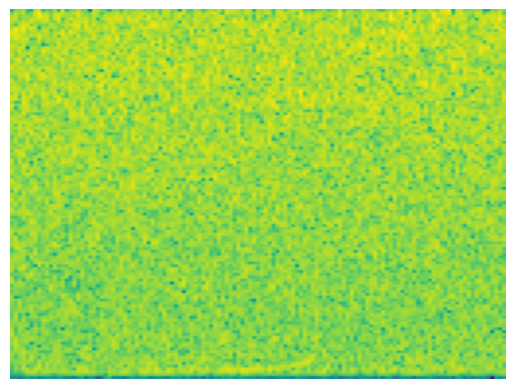

In [13]:
while l < 900:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

29 18
l =  900  SNR =  28.36112869039492  m1 =  29  m2 =  18
30 29
l =  900  SNR =  32.226928455826894  m1 =  30  m2 =  29
27 24
l =  900  SNR =  31.091605617008213  m1 =  27  m2 =  24
22 20
l =  900  SNR =  26.428511733690648  m1 =  22  m2 =  20
12 28
l =  900  SNR =  23.96953361753377  m1 =  12  m2 =  28
24 11
l =  900  SNR =  20.519492646486697  m1 =  24  m2 =  11
29 25
l =  900  SNR =  31.94770276342722  m1 =  29  m2 =  25
28 25
l =  900  SNR =  31.895731055138032  m1 =  28  m2 =  25
27 28
l =  900  SNR =  35.74808183102647  m1 =  27  m2 =  28
24 23
l =  900  SNR =  30.582689068271357  m1 =  24  m2 =  23
20 30
l =  900  SNR =  28.471544912522443  m1 =  20  m2 =  30
11 11
l =  900  SNR =  17.284343087727546  m1 =  11  m2 =  11
14 16
l =  901  SNR =  20.608245721084423  m1 =  14  m2 =  16
17 17
l =  901  SNR =  21.912806916725266  m1 =  17  m2 =  17
22 27
l =  901  SNR =  28.083711658345962  m1 =  22  m2 =  27
26 19
l =  901  SNR =  28.01824909381373  m1 =  26  m2 =  19
21 14
l =  90

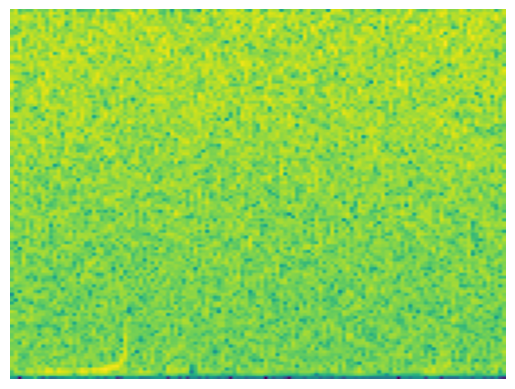

In [14]:
while l < 1000:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

14 23
l =  1000  SNR =  25.183082813468406  m1 =  14  m2 =  23
17 12
l =  1000  SNR =  19.969389589964422  m1 =  17  m2 =  12
25 20
l =  1001  SNR =  28.982976332027878  m1 =  25  m2 =  20
25 23
l =  1001  SNR =  30.56677363866627  m1 =  25  m2 =  23
30 25
l =  1001  SNR =  33.15099580094233  m1 =  30  m2 =  25
14 16
l =  1001  SNR =  21.30096920890822  m1 =  14  m2 =  16
26 28
l =  1001  SNR =  33.45761348580882  m1 =  26  m2 =  28
16 11
l =  1001  SNR =  18.45097746616568  m1 =  16  m2 =  11
19 28
l =  1002  SNR =  27.900567298715917  m1 =  19  m2 =  28
11 30
l =  1002  SNR =  22.90821747961214  m1 =  11  m2 =  30
14 13
l =  1002  SNR =  17.932234558748643  m1 =  14  m2 =  13
10 21
l =  1003  SNR =  19.141400823924794  m1 =  10  m2 =  21
14 30
l =  1004  SNR =  23.033384189639154  m1 =  14  m2 =  30
14 28
l =  1004  SNR =  25.364613909014192  m1 =  14  m2 =  28
30 15
l =  1004  SNR =  26.939698065284453  m1 =  30  m2 =  15
18 16
l =  1004  SNR =  23.91720641678544  m1 =  18  m2 =  16

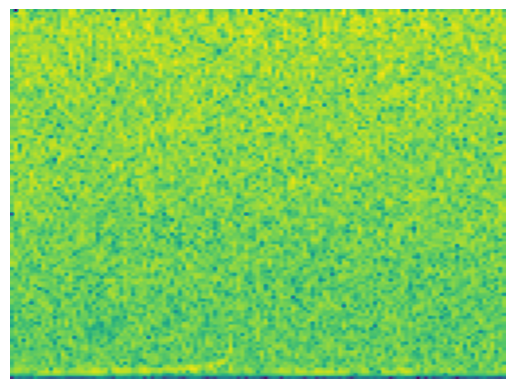

In [15]:
while l < 1100:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

21 23
l =  1100  SNR =  27.62562139431529  m1 =  21  m2 =  23
16 15
l =  1100  SNR =  21.784960703399985  m1 =  16  m2 =  15
14 29
l =  1100  SNR =  26.924314391007673  m1 =  14  m2 =  29
30 16
l =  1100  SNR =  27.689618972633507  m1 =  30  m2 =  16
26 19
l =  1100  SNR =  28.011558048203245  m1 =  26  m2 =  19
19 14
l =  1100  SNR =  21.481735097539097  m1 =  19  m2 =  14
25 14
l =  1100  SNR =  24.320318162352084  m1 =  25  m2 =  14
17 11
l =  1100  SNR =  19.276441292131928  m1 =  17  m2 =  11
22 21
l =  1101  SNR =  26.786521950969973  m1 =  22  m2 =  21
29 19
l =  1101  SNR =  27.557733883827275  m1 =  29  m2 =  19
14 29
l =  1101  SNR =  24.808198235526646  m1 =  14  m2 =  29
28 16
l =  1101  SNR =  26.28121249875147  m1 =  28  m2 =  16
18 13
l =  1101  SNR =  20.225409585186586  m1 =  18  m2 =  13
19 23
l =  1101  SNR =  28.054799141630056  m1 =  19  m2 =  23
14 24
l =  1101  SNR =  23.241049646037446  m1 =  14  m2 =  24
27 27
l =  1101  SNR =  32.28713584248262  m1 =  27  m2 =

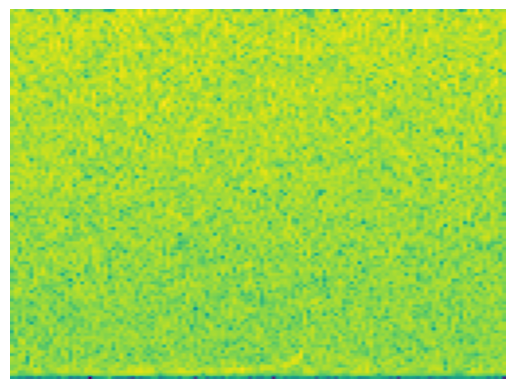

In [16]:
while l < 1200:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

24 30
l =  1200  SNR =  32.14937618555416  m1 =  24  m2 =  30
26 30
l =  1200  SNR =  32.9033543195899  m1 =  26  m2 =  30
18 21
l =  1200  SNR =  25.083298974812188  m1 =  18  m2 =  21
21 22
l =  1200  SNR =  28.317766010706443  m1 =  21  m2 =  22
19 21
l =  1200  SNR =  26.11471771458175  m1 =  19  m2 =  21
17 25
l =  1200  SNR =  26.41438461667153  m1 =  17  m2 =  25
13 15
l =  1200  SNR =  21.002029273883412  m1 =  13  m2 =  15
25 15
l =  1200  SNR =  24.221715124245666  m1 =  25  m2 =  15
23 11
l =  1200  SNR =  20.73532858548657  m1 =  23  m2 =  11
23 16
l =  1200  SNR =  24.604223726505843  m1 =  23  m2 =  16
21 16
l =  1200  SNR =  22.85496328847151  m1 =  21  m2 =  16
20 21
l =  1200  SNR =  27.606640485405666  m1 =  20  m2 =  21
29 25
l =  1200  SNR =  32.79638434750043  m1 =  29  m2 =  25
15 14
l =  1200  SNR =  20.4324546653394  m1 =  15  m2 =  14
28 22
l =  1200  SNR =  30.807492307821516  m1 =  28  m2 =  22
13 26
l =  1200  SNR =  22.275304000518393  m1 =  13  m2 =  26
25

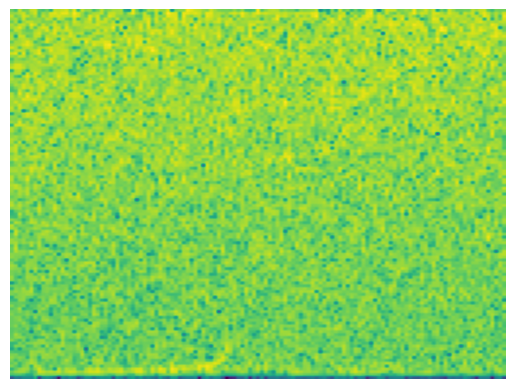

In [17]:
while l < 1300:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

25 28
l =  1300  SNR =  31.127405559091102  m1 =  25  m2 =  28
21 28
l =  1300  SNR =  31.094578358049837  m1 =  21  m2 =  28
25 14
l =  1300  SNR =  24.606867106084675  m1 =  25  m2 =  14
10 27
l =  1300  SNR =  18.96532375343075  m1 =  10  m2 =  27
18 21
l =  1301  SNR =  25.142204012594487  m1 =  18  m2 =  21
25 11
l =  1301  SNR =  22.05943464563683  m1 =  25  m2 =  11
20 20
l =  1301  SNR =  25.799455173623254  m1 =  20  m2 =  20
29 22
l =  1301  SNR =  31.61510660025697  m1 =  29  m2 =  22
15 14
l =  1301  SNR =  20.127175006339368  m1 =  15  m2 =  14
23 21
l =  1301  SNR =  27.71409880796695  m1 =  23  m2 =  21
11 30
l =  1301  SNR =  20.453377650693668  m1 =  11  m2 =  30
13 29
l =  1301  SNR =  24.495239043545183  m1 =  13  m2 =  29
24 24
l =  1301  SNR =  29.846137670436796  m1 =  24  m2 =  24
29 18
l =  1301  SNR =  27.910611845530955  m1 =  29  m2 =  18
22 13
l =  1301  SNR =  23.52475189899417  m1 =  22  m2 =  13
11 26
l =  1301  SNR =  22.930450472779956  m1 =  11  m2 =  

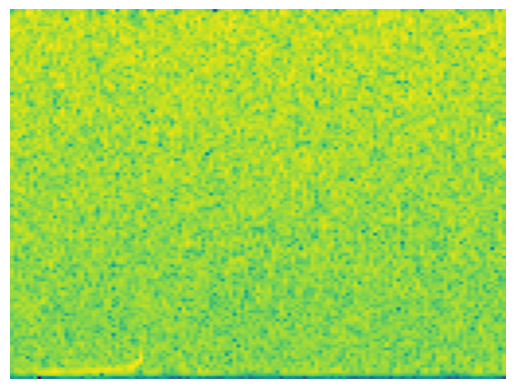

In [18]:
while l < 1400:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

15 14
l =  1400  SNR =  21.217854676153003  m1 =  15  m2 =  14
13 29
l =  1400  SNR =  24.075122978264467  m1 =  13  m2 =  29
19 15
l =  1400  SNR =  24.551363428850735  m1 =  19  m2 =  15
22 13
l =  1400  SNR =  22.01832361819455  m1 =  22  m2 =  13
14 14
l =  1400  SNR =  19.843245705652645  m1 =  14  m2 =  14
27 16
l =  1401  SNR =  26.375681328966024  m1 =  27  m2 =  16
26 27
l =  1401  SNR =  32.92173156517115  m1 =  26  m2 =  27
24 29
l =  1401  SNR =  31.186615113825724  m1 =  24  m2 =  29
13 21
l =  1401  SNR =  21.85854991029921  m1 =  13  m2 =  21
10 10
l =  1401  SNR =  15.620198022510548  m1 =  10  m2 =  10
13 10
l =  1402  SNR =  16.199412087448476  m1 =  13  m2 =  10
29 19
l =  1403  SNR =  28.976150338711346  m1 =  29  m2 =  19
17 26
l =  1403  SNR =  28.86965450468539  m1 =  17  m2 =  26
24 15
l =  1403  SNR =  26.178902136895644  m1 =  24  m2 =  15
13 10
l =  1403  SNR =  17.161063427375367  m1 =  13  m2 =  10
29 27
l =  1404  SNR =  33.07236379354129  m1 =  29  m2 =  

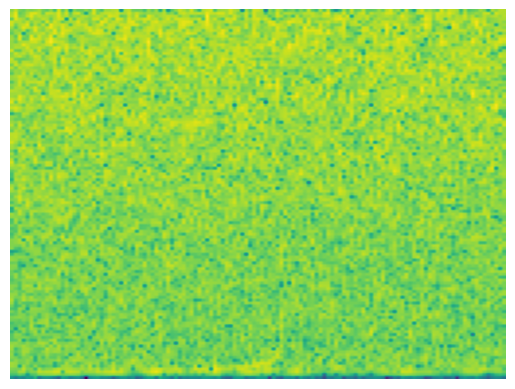

In [19]:
while l < 1500:

    # WVFRM generation
    m1 = random.randint(10, 30)
    m2 = random.randint(10, 30)

    print(m1, m2)
    hp, hc = get_td_waveform(
        approximant="IMRPhenomT",
        mass1=m1,
        mass2=m2,
        delta_t=delta_t,
        f_lower=30,
    )
    hp.resize(16384)
    hc.resize(16384)

    wvfrm = hp / random_scale

    excluded_values = [3, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 20]
    x = random.choice([value for value in range(3, 21) if value not in excluded_values])
    wvfrm.roll(len(wvfrm) // x)
    wvfrm.cyclic_time_shift(wvfrm.start_time)
    max_time = wvfrm.sample_times[wvfrm.numpy().argmax()]
    # plt.plot(wvfrm.sample_times, wvfrm)
    # plt.show()

    # genereating noise
    noise = noise_from_psd(tsamples, delta_t, psd, seed=(l + 22500))

    # adding noise to waveform
    noise._epoch = wvfrm._epoch
    signal = wvfrm + noise

    # SNR calculation
    snr = pycbc.filter.matched_filter(wvfrm, signal, psd=psd, low_frequency_cutoff=flow)
    peak = abs(snr).numpy().argmax()
    snrp = snr[peak]
    time = snr.sample_times[peak]
    snr_peak = abs(snrp)
    print("l = ", l, " SNR = ", snr_peak, " m1 = ", m1, " m2 = ", m2)

    SNR_array_1.append(snr_peak)
    plt.axis("off")  # Turn off the axis labels
    # plt.show()
    plt.specgram(signal, Fs=2048)
    if 5 < snr_peak < 20:
        plt.savefig(
            f"/home/arush/GW_Project_1/Data_Generation/Continous_Check/Data/SNR={snr_peak}_m1={m1}_m2={m2}_{l+22500}_time={max_time}.png",
            bbox_inches="tight",
            pad_inches=0,
        )
        l += 1

wavform generate random mass
scale wvfrm
add to noise
calc snr
make spectrograms
classify into folders
